In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# 1. 데이터 생성
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = 2 * x + 3 + 0.1 * torch.randn(x.size())

x.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [3]:
# 2. 모델 클래스 정의 (3층 구조: 1 → 16 → 8 → 1)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(1, 16)  # 입력층 → 은닉층1
        self.fc2 = nn.Linear(16, 8)  # 은닉층1 → 은닉층2
        self.fc3 = nn.Linear(8, 1)   # 은닉층2 → 출력층
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [6]:
# 3. 모델, 손실 함수, 옵티마이저 정의
model = MLP()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [7]:
# 4. 학습 루프
for epoch in range(100):
    model.train()
    output = model(x)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 8.5894
Epoch 10, Loss: 4.4418
Epoch 20, Loss: 1.1911
Epoch 30, Loss: 0.5154
Epoch 40, Loss: 0.2901
Epoch 50, Loss: 0.1549
Epoch 60, Loss: 0.0806
Epoch 70, Loss: 0.0445
Epoch 80, Loss: 0.0285
Epoch 90, Loss: 0.0214


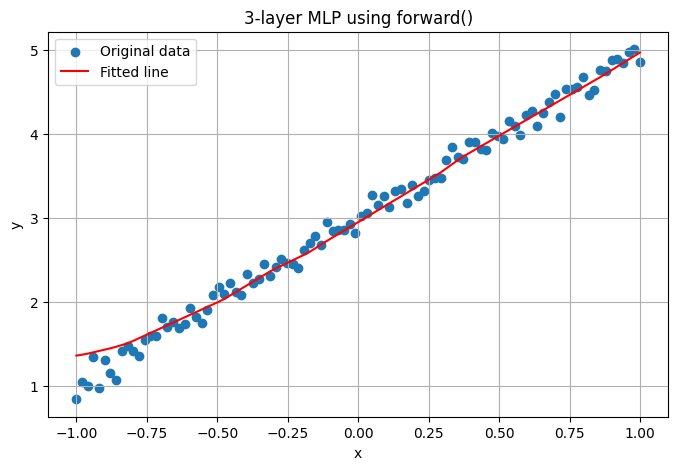

In [8]:
# 5. 예측 결과 시각화
model.eval()
predicted = model(x).detach().numpy()

plt.figure(figsize=(8, 5))
plt.scatter(x.numpy(), y.numpy(), label='Original data')
plt.plot(x.numpy(), predicted, color='red', label='Fitted line')
plt.title("3-layer MLP using forward()")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Model Save
model = MLP()
torch.save(model, "./model/model_full.pth")

In [11]:
# Model Load
model_loaded = torch.load("./model/model_full.pth")
model_loaded

MLP(
  (fc1): Linear(in_features=1, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [17]:
# Prediction
# evaluation 모드로 전환
model.eval()

input_data = torch.tensor([[0.2], [0.5], [1.0]])  # shape: (3, 1)

# prediction
with torch.no_grad() :
    predictions = model_loaded(input_data)

print(input_data, input_data.shape, input_data.squeeze().shape)
print(predictions)


tensor([[0.2000],
        [0.5000],
        [1.0000]]) torch.Size([3, 1]) torch.Size([3])
tensor([[-0.2260],
        [-0.2211],
        [-0.2012]])


In [14]:
print("입력값:", input_data.squeeze().tolist())
print("예측값:", predictions.squeeze().tolist())

입력값: [0.20000000298023224, 0.5, 1.0]
예측값: [-0.22595392167568207, -0.2211092710494995, -0.20121917128562927]
